<a href="https://colab.research.google.com/github/developerNishtha/Cpp-Competitive-Programming-/blob/main/DAV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis**
---
**Mentor:** Dhaval Deshkar Sir</br>

**Subject:** DAV</br>
**Subject code:** BCS506</br>

**Name:** Shah Nishtha
</br>
**Enrollment No.:** 200031101611048

**Name:** Patel Het
</br>
**Enrollment No.:** 200031101611039

</br>

# <img src="https://miro.medium.com/max/700/1*0OVev9mGkNJblfkOxkknAQ.png">




In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 70% 57.0M/80.9M [00:00<00:00, 97.0MB/s]
100% 80.9M/80.9M [00:00<00:00, 117MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sentiment140.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

<div class="alert alert-block alert-info">  
<h1><strong>Context</strong></h1>
    <p>Millions of people are using Twitter and expressing their emotions like happiness, sadness, angry, etc. The Sentiment analysis is also about detecting the emotions, opinion, assessment, attitudes, and take this into consideration as a way humans think. Sentiment analysis classifies the emotions into classes such as positive or negative. Nowadays, industries are interested to use textual data for semantic analysis to extract the view of people about their products and services. Sentiment analysis is very important for them to know the customer satisfaction level and they can improve their services accordingly. To work on the text data, they try to extract the data from social media platforms. There are a lot of social media sites like Google Plus, Facebook, and Twitter that allow expressing opinions, views, and emotions about certain topics and events. Microblogging site Twitter is expanding rapidly among all other online social media networking sites with about 200 million users. Twitter users use to post their thoughts, emotions, and messages on their profiles, called tweets. Words limit of a single tweet has 140 characters. Twitter sentiment analysis based on the NLP (natural language processing) field. For tweets text, we use NLP techniques like tokenizing the words, removing the stop words like I, me, my, our, your, is, was, etc. Natural language processing also plays a part to preprocess the data like cleaning the text and removing the special characters and punctuation marks. Sentimental analysis is very important because we can know the trends of people’s emotions on specific topics with their tweets.</p>
    <br>
        <hr>
      <h3><b>Problem Statement: </b> </h3>
    <hr>
<ul>
    To derive a sentimental analyzer for overcoming the challenges to identify the twitter tweets text sentiments (positive, negative) by implementing neural network using tensorflow.
</ul>

</br>
<hr>
<h3><b>Evolution measures: </b> </h3>
<hr>
<ul>
<p> After training the model, we apply the evaluation measures to check that how the model is getting predictions. We will use the following evaluation measures to evaluate the performance of the models:</p>
    <li>Accuracy</li>
    <li>Confusion matrix with plot</li>
    <li>ROC Curve</li>
</ul>
</br>
<hr>
<h3><b>Technical Approach</b></h3>
<hr>
<p>We are using python language in the implementations and Colab that support the machine learning and data science projects. We will build tensorflow based model. We will use Sentiment 140 dataset and split that data into 70% for training and 30% for the testing purposes. After training on the model, we will evaluate the model to evaluate the performance of trained model.</p>
</br>
<hr>
<h3><b>Data Dictionary</b></h3>
<hr>
<ul>
    <li>target: the polarity of the tweet</li>
    <li>ids: The id of the tweet </li>
    <li>date: the date of the tweet </li>
    <li>flag: The query. If there is no query, then this value is NO_QUERY.</li>
    <li>user: the user that tweeted </li>
    <li>text: the text of the tweet</li>
</ul>

</div>

<div class="alert alert-block alert-danger">  
<h2><strong>Importing Python Libraries 📗 📘 </strong></h2>
        
</div>

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

<h4> We are uisng the following libraries:</h4>

- numpy 

- pandas

- tensorflow

- keras

- nltk

- seaborn

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-danger">  
<h2><strong>Loading the data 📁 📂</strong></h2>
        
</div>

In [ ]:
data = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

<div class="alert alert-block alert-danger">  
<h2><strong>Understanding the structure of the data 🔎 📊</strong></h2>
        
</div>

In [ ]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.tail()

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


**Observations:**</br>
The DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the detail about tweet.

<div class="alert alert-block alert-danger">  
<h2><strong>Numbers of rows and columns present in data</strong></h2>
        
</div>

In [ ]:
print('Count of rows in the data is: ', len(data))
print('Count of columns in the data is: ', len(data.columns))
data.shape

Count of rows in the data is:  1599999
Count of columns in the data is:  6


(1599999, 6)

**Observations:**</br> We have 1599999 rows and 6 columns in the data. The rows account for all the tweets processed

<div class="alert alert-block alert-danger">  
<h2><strong>Datatypes of the different columns in the dataset</strong></h2>
        
</div>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

**Observations:**</br> We have 2 integers and 4 objects.

<div class="alert alert-block alert-danger">  
<h2><strong>Checking Null values</strong></h2>
        
</div>

In [ ]:
np.sum(data.isnull().any(axis=1))

0

**Observations:**</br> We don't have any null values.

<div class="alert alert-block alert-danger">  
<h2><strong>Ploting Graphs on basis of provided observation</strong></h2>
        
</div>

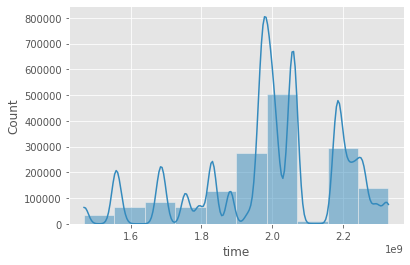

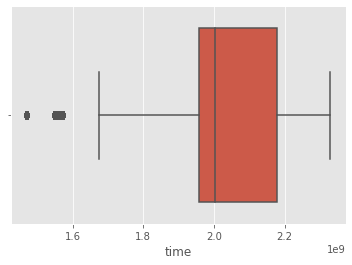

In [ ]:
sns.histplot(data = data, x='time',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data = data, x='time')
plt.show();

**Observations:**</br> The histplot and boxplot is skewed higher between 1.9 to 2.1 hence maximum number of tweets are done during that duration. 

<div class="alert alert-block alert-danger">  
<h1><strong>Data Preparation 📝</strong></h1>
</div>


<div class="alert alert-block alert-danger">  
<h2><strong>Selecting the text and label coloumn</strong></h2>
        
</div>

In [ ]:
data=data[['text','label']]

**Observations:**</br> Selected text and label column for further proccess.

<div class="alert alert-block alert-danger">  
<h2><strong>Assigning 1 to Positive sentment 4</strong></h2>
        
</div>

In [ ]:
data['label'][data['label']==4]=1

**Observations:**</br> Assigned 1 to positive sentement 4. 

<div class="alert alert-block alert-danger">  
<h2><strong>Separating positive and negative tweets</strong></h2></div>


In [ ]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

**Observations:**</br> Storing positive tweets in data_pos and negative tweets in data_neg.

<div class="alert alert-block alert-danger">  
<h2><strong>Taking one fourth data so we can run on our machine easily </strong></h2></div>

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

**Observations:**</br>Data has been converted to its one forth so that machine can run easily.

<div class="alert alert-block alert-danger">  
<h2><strong>Combining positive and negative tweets</strong></h2></div>

In [ ]:
data = pd.concat([data_pos, data_neg])

**Observations:**</br> Positive and Negative data is combined. 

<div class="alert alert-block alert-danger">  
<h2><strong>Making statement text in lower case </strong></h2></div>

In [ ]:
data['text']=data['text'].str.lower()

In [ ]:
data['text'].tail()

19995                            one more day of holidays 
19996    feeling so down right now .. i hate you damn h...
19997    geez,i hv to read the whole book of personalit...
19998    i threw my sign at donnie and he bent over to ...
19999    @heather2711 good thing i didn't find any then...
Name: text, dtype: object

**Observations:**</br> As you can see all sentements is converted into lower case.

<div class="alert alert-block alert-danger">  
<h2><strong>Cleaning and removing Stop words of english</strong></h2></div>

In [ ]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Observations:**</br> Created stopwords list.

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

**Observations:**</br> All the stopwords which are imported are joined using " , ".

<div class="alert alert-block alert-danger">  
<h2><strong>Cleaning and removing the above stop words list from the tweet text</strong></h2></div>

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

**Observations:**</br> Stopwords from the sentiments has been removed.

<div class="alert alert-block alert-danger">  
<h2><strong>Cleaning and removing punctuations  </strong></h2></div>

In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

**Observations:**</br> All the punctuations has been removed from the sentiments.

<div class="alert alert-block alert-danger">  
<h2><strong>Cleaning and removing repeating characters </strong></h2></div>

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

**Observations:**</br> Repeated characters has been removed from sentements.

<div class="alert alert-block alert-danger">  
<h2><strong>Cleaning and removing email </strong></h2></div>

In [ ]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

**Observations:**</br>E-Mails has been removed from sentements.

<div class="alert alert-block alert-danger">  
<h2><strong>Cleaning and removing URL's </strong></h2></div>

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

**Observations:**</br> URLs has been removed from sentements.

<div class="alert alert-block alert-danger">  
<h2><strong> Cleaning and removing Numeric numbers </strong></h2></div>

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

**Observations:**</br>Numeric Numbers has been removed from sentements.

<div class="alert alert-block alert-danger">  
<h2><strong>Getting tokenization of tweet text </strong></h2></div>

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [ ]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

**Observations:**</br>Tokenizer has been applied to the sentements.

<div class="alert alert-block alert-danger">  
<h2><strong> Applying Stemming</strong></h2>
<img src="https://lh3.googleusercontent.com/3wumK8lGLhKpD2Fhbu35I7wWf6OSpF_erX9T7FX9WQCE5_HBKMJpKOZNximlzlTG5882QUWcL-_lFLJd0-RIo4uHDaO7cK8aEnw2Tm2-5xPwjYS3ls6fYefeGAVGb1WUGrXafJrC"> </img>
</div>


In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [ ]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

**Observations:**</br>Stemming has been applied to the sentements.

<div class="alert alert-block alert-danger">  
<h2><strong>Applying Lemmatizer</strong></h2></div>

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

**Observations:**</br>Lemmatization has been applied to the sentements.

<b> <h3> Labels : </h3></b>  labels are the targets like in this project senitments of the tweets are labels. 

<b> <h3> Inputs : </h3></b>  Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs. 

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

<b> <h3> Validation Data </h3></b>  We use validation data while training the model. We use this data to evalaute the performance that how the model perform on training time.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

<div class="alert alert-block alert-danger">  
<h2><strong>Separating input feature and label </strong></h2></div>

In [ ]:
X=data.text
y=data.label

**Observations:**</br>Input features and labels have been seperated respectively using x and y.

<div class="alert alert-block alert-danger">  
<h2><strong>Preparing the input features for training</strong></h2>
<ul>
<li>We converting the text words into arrays form.</li>
<li>Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.</li>
</ul>
</div>

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

**Observations:**</br>Features/Words are converted in the form of array.

In [ ]:
sequences_matrix.shape

(40000, 500)

**Observations:**</br>As we can see that there total 40000 tweets and the number words/features are 500.

<div class="alert alert-block alert-danger">  
<h2><strong>Separating the 70% data for training data and 30% for testing data</strong></h2></div>

<h4> Step 1</h4>
- The input to model is 500 words because these are the number features/words that we extracted above from text of tweets.

<h4> Step 2</h4>
- Embeddings provide the presentation of words and their relative meanings. Like in this, we are feeding the limit of maximum words, lenght of input words and the inputs of previous layer. 

<h4> Step 3</h4>
- LSTM (long short term memory) save the words and predict the next words based on the previous words. LSTM is a sequance predictor of next coming words.


<h4> Step 4</h4>
- Dense layer reduce the outputs by getting inputs from Faltten layer. Dense layer use all the inputs of previous layer neurons and perform calculations and send 256 outputs

<h4> Step 5</h4>
- Activation function is node that is put at the end of all layers of neural network model or in between neural network layers. Activation function help to decide which neuron should be pass and which neuron should fire. So activation function of node defines the output of that node given an input or set of inputs. 


<h4> Step 6</h4>
- Droupout layer drop some neurons from previous layers. why we apply this? We apply this to avoid the overfitting problems. In overfitting, model give good accuracy on training time but not good on testing time.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

**Observations:**</br>Tweets has been divided into two parts :
*   70% tweets will be used in the training 
*   30% tweets will be used to test the performance of the model.




<div class="alert alert-block alert-danger">  
<h2><strong>Implementing Tensorflow based model for training 🧪</strong></h2>   
</div>

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

**Observations:**</br>Tensorflow based model has been implemented for training.

<div class="alert alert-block alert-danger">  
<h2><strong>Model compilation</strong></h2>   
</div>

- First we are calling the model
- We are using 2 classes so we set "binary_crossentropy" and if we use more than two classes then we use "categorical_crossentropy" 
- Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer.
- We are setting metrics=accuracy because we are going to caluclate the percentage of correct predictions over all predictions on the validation set

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

**Observation :** 
</br>
For correct prediction we have set the accuracy of metrics and compiled model.

<div class="alert alert-block alert-danger">  
<h2><strong>Training and validating with parameter tuning</strong></h2>   
</div>

- We are feeding the training data and getting 10% data for validation from training data
* We set the following parameters:
- Batch size =80 so the model take 80 tweets in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration. 
- Epochs =6 so the model will train on the data 6 times.Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. 
- We can choose batch_size, and epochs as we want so the good practice is to set some values and train the model if the model will not give the good results we can change it and then try again for the training of the model. We can repeat this process many time untill we will not get the good results and this process called as parameter tuning.


In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
315/315 [==============================] - 75s 232ms/step - loss: 0.5740 - accuracy: 0.6963 - val_loss: 0.5186 - val_accuracy: 0.7396
Epoch 2/6
315/315 [==============================] - 74s 236ms/step - loss: 0.5775 - accuracy: 0.7136 - val_loss: 0.5363 - val_accuracy: 0.7382
Epoch 3/6
315/315 [==============================] - 75s 237ms/step - loss: 0.4912 - accuracy: 0.7646 - val_loss: 0.5141 - val_accuracy: 0.7414
Epoch 4/6
315/315 [==============================] - 74s 236ms/step - loss: 0.4849 - accuracy: 0.7673 - val_loss: 0.5231 - val_accuracy: 0.7432
Epoch 5/6
315/315 [==============================] - 74s 236ms/step - loss: 0.4872 - accuracy: 0.7673 - val_loss: 0.5255 - val_accuracy: 0.7471
Epoch 6/6
315/315 [==============================] - 75s 237ms/step - loss: 0.4586 - accuracy: 0.7802 - val_loss: 0.5330 - val_accuracy: 0.7404
Training finished !!


**Observation :** 
</br>
Epoch has been called 6 times and model has been trained.

<h1> We need to do all the above configurations to train the model. If we will not set all settings correctly then we could not get the desired results.</h1>

<div class="alert alert-block alert-danger">  
<h2><strong>Testing the Trained model on test data</strong></h2>   
</div>

- Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [ ]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

375/375 [==============================] - 16s 41ms/step - loss: 0.5245 - accuracy: 0.7439


**Observation :** 
</br>
Trained model has been tested on test data.

<div class="alert alert-block alert-danger">  
<h2><strong>Accuracy</strong></h2>   
</div>

- Accuracy is the number of correctly classify tweets from all the tweets of positive and negative. 
- For example, if the trained model classify the 70 tweets correct and 30 tweets wrong from total of 100 tweets then the accuracy score will be 70%. 
- Accuracy= Total number of correct predictions/Total number of predictions

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.74


**Observation :** 
</br>
Accuracy has been tested on test data and the result is 74% accurate.

<div class="alert alert-block alert-danger">  
<h2><strong>Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions</strong></h2>   
</div>

- As the model give probabilties so we are setting a threshold 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets.

In [ ]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 [==============================] - 16s 41ms/step


**Observation :** 
</br>
Threshold point has been set and if the probability is above 0.5 means the tweet is positive and if below tweet is negative.

<div class="alert alert-block alert-danger">  
<h2><strong>Confusion matrix</strong></h2>   
</div>

- These are the evaluation measures to evaluate the performance of the model.
- Dark blue boxes are the correct predictions with the trained model and sky blue boxes shows the wrong predictions.




confusion matrix


[[4381 1628]
 [1445 4546]]




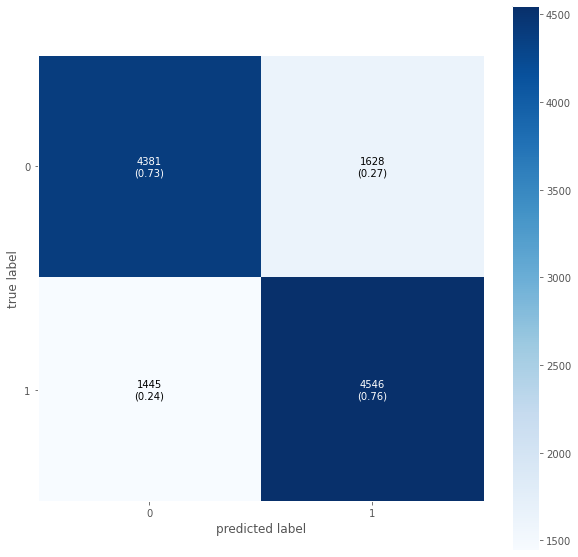

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Observation :** 
</br>

- 4610 tweets correctly predicted as negative sentiments. 1399 tweets predicted positive sentiments but that were actually negative sentiments.
- 4247 tweets correctly predicted as postive sentiments. 1744 tweets predicted negative sentiments but that were actually positive sentiments.

<div class="alert alert-block alert-danger">  
<h2><strong>ROC CURVE</strong></h2>   
</div>

- ROC curve show the performance of the model as well. 

- ROC curve (receiver operating characteristic curve) show the performance of a classification model at all the classification thresholds. ROC plots two parameters, True Positive Rate (correct predictions/classifications) False Positive Rate (wrong predictions/classifications)

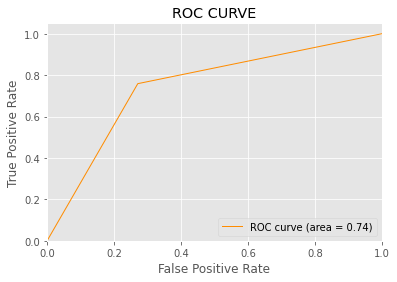

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Observation :** 
</br>

We can see that the model started from the 0 percent predictions and then moved to true positive predictions that are correct

<div class="alert alert-block alert-success">  
<h1><strong>Conclusion 📝</strong></h1>
    <h4>
<li>We used the twitter sentiment analysis dataset and explored the data with different ways.</li>
        <li>We prepared the text data of tweets by removing the unnecessary things.</li>
          <li>We trained model based on tensorflow with all settings. </li>
        <li>We evaluated thye model with different evaluation measures.</li>
         <li>If you are interested to work on any text based project, you can simply apply the same methodolgy but might be you will need to change little settings like name of coloumns etc.</li>
        <li>We worked on the classification problem and sepcifically we call it binary classification which is two class classification.</li>
        </h4>
</div>

<div class="alert alert-block alert-success">  
<h1><strong>Recommendations</strong></h1>
    <h4>
    Based on the observations in this analysis below is recommended :
<li>
Company can get trending topic.</li>
        <li>Company can identify users interests and using that can show ads related to their interests.</li>
          <li>Through this company can identify positive and negative tweets and with the help of this company can get the ratio of people liking and disliking that perticular thing. </li>
        </h4>
</div>
</br>

---

